# 引入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 不平衡样本|
from imblearn.under_sampling import RandomUnderSampler

# label2number
from sklearn.preprocessing import LabelEncoder

# split
from sklearn.model_selection import train_test_split

# random forest
from sklearn.ensemble import RandomForestClassifier

# loss
from sklearn.metrics import log_loss

# one-hot
from sklearn.preprocessing import OneHotEncoder

# 读取文件

In [2]:
train_data = pd.read_csv("../data/otto/train.csv")
train_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
train_data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [4]:
train_data.shape, train_data.size

((61878, 95), 5878410)

In [5]:
train_data.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

# seaborn图形可视化查看数据分布

<AxesSubplot: xlabel='target', ylabel='count'>

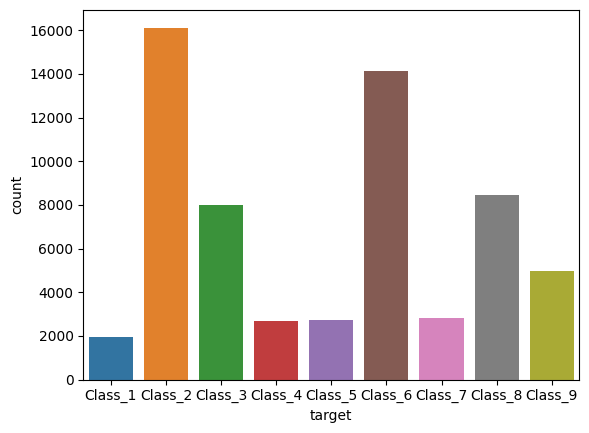

In [ ]:
sns.countplot(x=train_data["target"])

<AxesSubplot: xlabel='target', ylabel='count'>

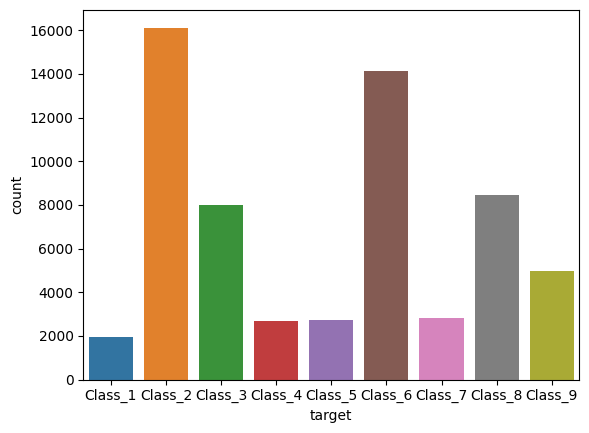

In [ ]:
sns.countplot(train_data, x="target")

<AxesSubplot: xlabel='target', ylabel='Count'>

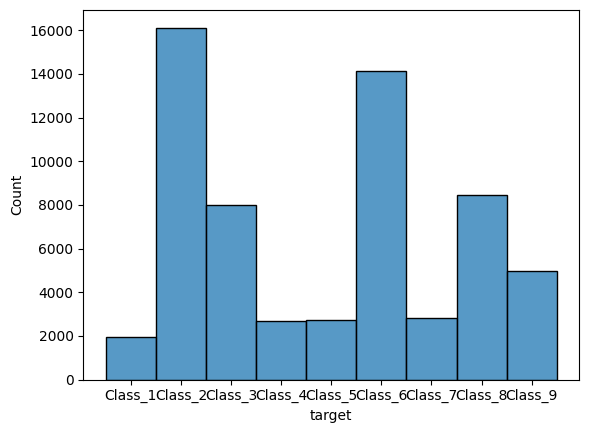

In [6]:
# 这样写不能加 hue="target"
sns.histplot(train_data["target"])

<AxesSubplot: xlabel='target', ylabel='Count'>

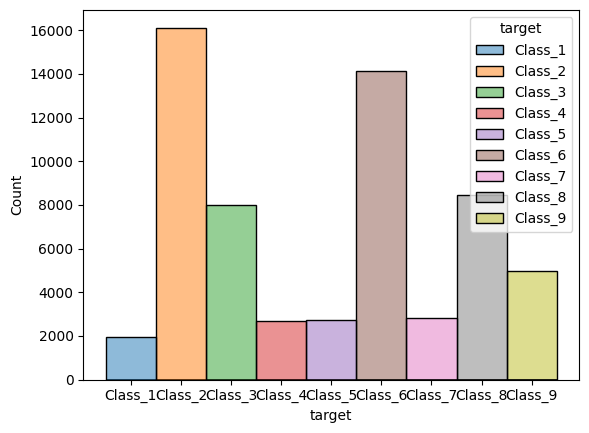

In [7]:
sns.histplot(train_data, x="target", hue="target")

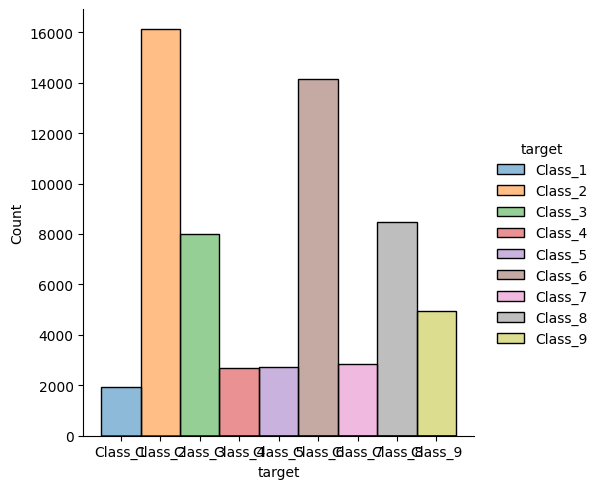

In [8]:
# 和上面的参数可以写一样
sns.displot(train_data, x="target", hue="target")

上图可以看出,该数据类别不均衡,所以需要后期处理
# 数据基本处理
数据已经经过脱敏,不需要特殊处理

## 截取部分数据

In [9]:
train_data1 = train_data[:1000]
train_data1.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


<AxesSubplot: xlabel='target', ylabel='count'>

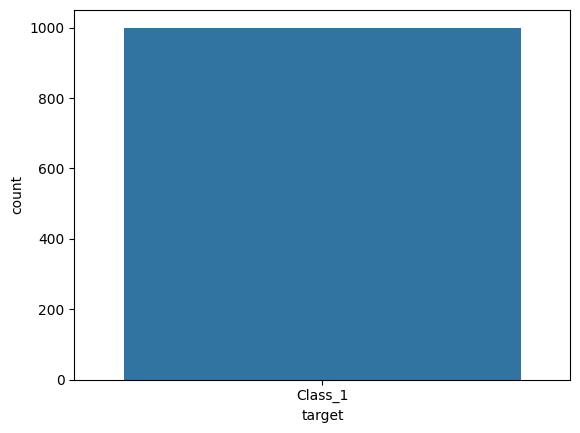

In [ ]:
# 只有类别1
sns.countplot(train_data1, x="target")

## 使用随机欠采样获取数据

In [11]:
# 首先确定特征值/目标值
y = train_data["target"]
y.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [12]:
under = RandomUnderSampler(random_state=0)

In [13]:
train_data.shape, y.shape

((61878, 95), (61878,))

In [14]:
train_data_resampled, y_resampled = under.fit_resample(train_data, y)
train_data_resampled.shape, y_resampled.shape

((17361, 95), (17361,))

In [15]:
train_data_resampled.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


<AxesSubplot: xlabel='target', ylabel='count'>

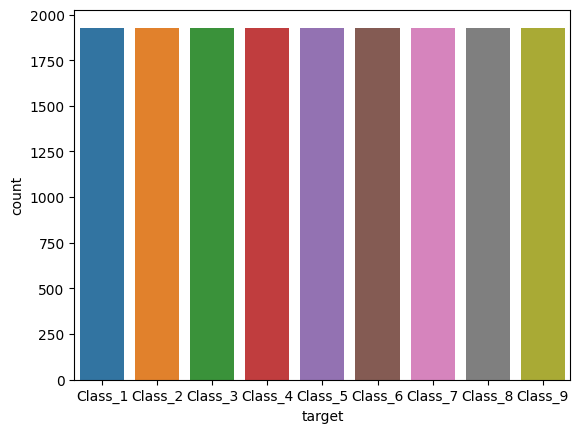

In [ ]:
sns.countplot(x=train_data_resampled["target"])

In [17]:
# 去除id和target
x_resampled = train_data_resampled.drop(["id", "target"], axis=1)
x_resampled.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## 目标标签值转换成数字 LabelEncoder

In [18]:
y_resampled.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [19]:
le = LabelEncoder()

In [20]:
y_resampled_num = le.fit_transform(y_resampled)
y_resampled_num

array([0, 0, 0, ..., 8, 8, 8])

## 分割数据 train_test_split

In [21]:
x_train, x_val, y_train, y_val = train_test_split(
    x_resampled, y_resampled_num, test_size=0.2, random_state=0
)

In [22]:
x_train.shape, y_train.shape

((13888, 93), (13888,))

# 模型训练

## 基本模型训练

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
rf.score(x_val, y_val)

0.7823207601497265

In [26]:
y_predict = rf.predict(x_val)
y_predict

array([0, 4, 2, ..., 4, 2, 1])

## 数据可视化
展示效果不是很好

<AxesSubplot: ylabel='count'>

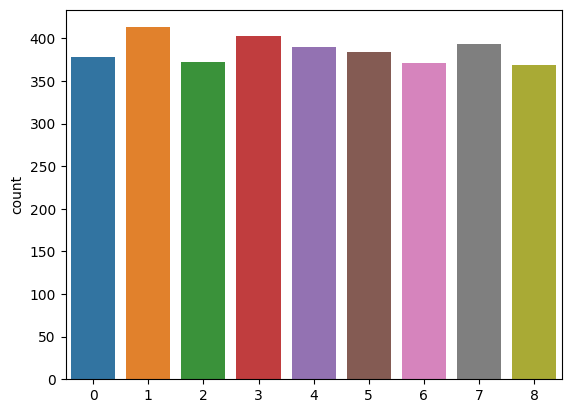

In [27]:
sns.countplot(x=y_predict)

## log_loss模型评估,越小越好

In [30]:
y_val, y_predict

(array([0, 4, 2, ..., 4, 2, 1]), array([0, 4, 2, ..., 4, 2, 1]))

In [31]:
# normalize=True 标准化
log_loss(y_val, y_predict, eps=1e-15, normalize=True)

ValueError: y_true and y_pred contain different number of classes 9, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3 4 5 6 7 8]

上面报错原因:log_loss使用过程中必须要求输出使用one-hot表示, 需要将这个多类别问题的输出结果通过OneHotEncoder修改为如下:
## 将数据修改为OneHot格式

In [36]:
one_hot = OneHotEncoder(sparse_output=False)

In [37]:
one_hot.fit(y_val.reshape(-1, 1))

y_val_one_hot = one_hot.transform(y_val.reshape(-1, 1))
y_predict_one_hot = one_hot.transform(y_predict.reshape(-1, 1))
y_val_one_hot, y_predict_one_hot

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]))

In [38]:
# normalize=True 标准化
log_loss(y_val_one_hot, y_predict_one_hot, eps=1e-15, normalize=True)
# 数据太大了

7.418925191650849

## predict_proba 改变预测值的输出模式,让输出结果为百分占比,降低log_loss值

In [39]:
y_pred_proba = rf.predict_proba(x_val)
# 结果全是百分比,并且类型是二维数组,就是onehot模式,直接使用即可
y_pred_proba

array([[0.35, 0.01, 0.  , ..., 0.06, 0.05, 0.19],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.01, 0.29, 0.56, ..., 0.05, 0.04, 0.01],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.15, 0.6 , ..., 0.03, 0.  , 0.  ],
       [0.  , 0.73, 0.12, ..., 0.02, 0.  , 0.  ]])

In [40]:
log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)

0.7236742571333502

# 模型调优
- n_estimators: 子树的数量
- max_features: 每个决策树的最大特征数量
- max_depth: 树的最大深度
- min_samples_leaf: 叶子节点的最小样本数


## n_estimators
n_estimators：integer，optional（default = 100） <br/>
在利用最大投票数或平均值来预测之前，你想要建立子树的数量。 森林里的树木数量120,200,300,500,800,1200


In [43]:
# 确定n_estimators取值范围
n_estimators_candidate = np.arange(10, 201, 10)
n_estimators_candidate

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [42]:
def turn_n_estimators(
    n_estimators_candidate: np.ndarray,
) -> tuple[list[float], list[float]]:
    accuracys = []
    losses = []
    for n in n_estimators_candidate:
        print("*" * 50)
        print("n_estimators =", n)
        rf = RandomForestClassifier(
            n_estimators=n,  # here
            max_features=10,
            max_depth=10,
            min_samples_leaf=10,
            oob_score=True,
            random_state=0,
            n_jobs=4,
        )
        rf.fit(x_train, y_train)

        # 预测得分
        score = rf.score(x_val, y_val)
        accuracys.append(score)
        print("score =", score)

        # 预测概率,需要one-hot编码
        y_pred_proba = rf.predict_proba(x_val)
        loss = log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)
        losses.append(loss)
        print("loss =", loss)

    return accuracys, losses

In [ ]:
accuracys1, losses1 = turn_n_estimators(n_estimators_candidate)

Text(0, 0.5, 'loss')

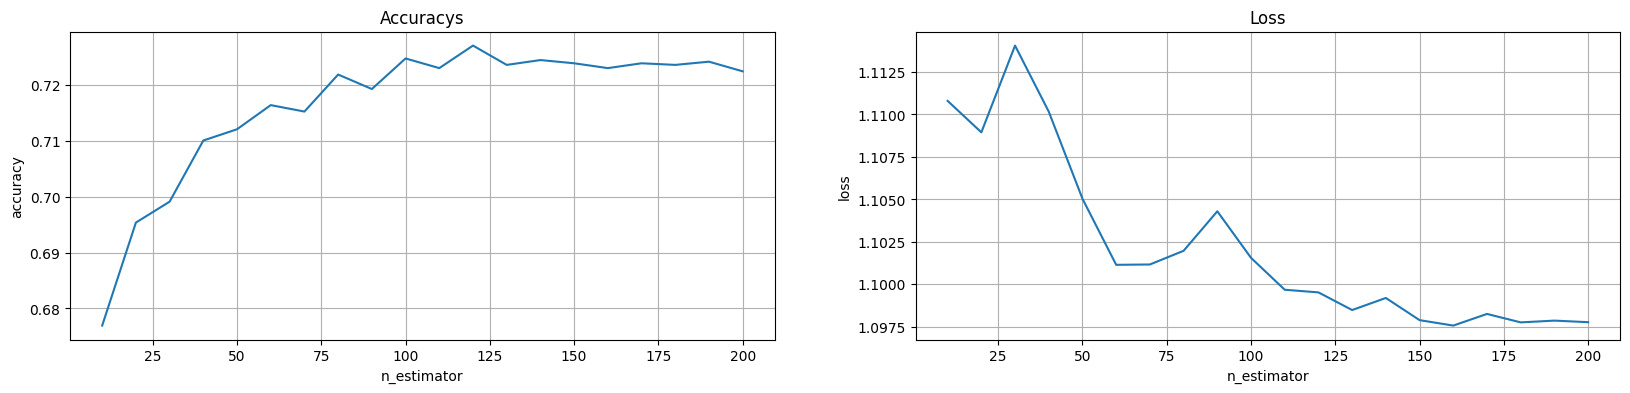

In [45]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axis[0].plot(n_estimators_candidate, accuracys1)
axis[0].grid()
axis[0].set_title("Accuracys")
axis[0].set_xlabel("n_estimn_estimatorsator")
axis[0].set_ylabel("accuracy")

axis[1].plot(n_estimators_candidate, losses1)
axis[1].grid()
axis[1].set_title("Loss")
axis[1].set_xlabel("n_estimators")
axis[1].set_ylabel("loss")

plt.show()
plt.close()

### n_estimators=175 的时候表现效果不错

## max_features

In [47]:
# 确定max_features取值范围
max_features_candidate = np.arange(5, 41, 5)
max_features_candidate

array([ 5, 10, 15, 20, 25, 30, 35, 40])

In [48]:
def turn_max_features(
    max_features_candidate: np.ndarray,
) -> tuple[list[float], list[float]]:
    accuracys = []
    losses = []
    for n in max_features_candidate:
        print("*" * 50)
        print("max_features =", n)
        rf = RandomForestClassifier(
            n_estimators=175,
            max_features=n,  # here
            max_depth=10,
            min_samples_leaf=10,
            oob_score=True,
            random_state=0,
            n_jobs=4,
        )
        rf.fit(x_train, y_train)

        # 预测得分
        score = rf.score(x_val, y_val)
        accuracys.append(score)
        print("score =", score)

        # 预测概率,需要one-hot编码
        y_pred_proba = rf.predict_proba(x_val)
        loss = log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)
        losses.append(loss)
        print("loss =", loss)

    return accuracys, losses

In [ ]:
accuracys2, losses2 = turn_max_features(max_features_candidate)

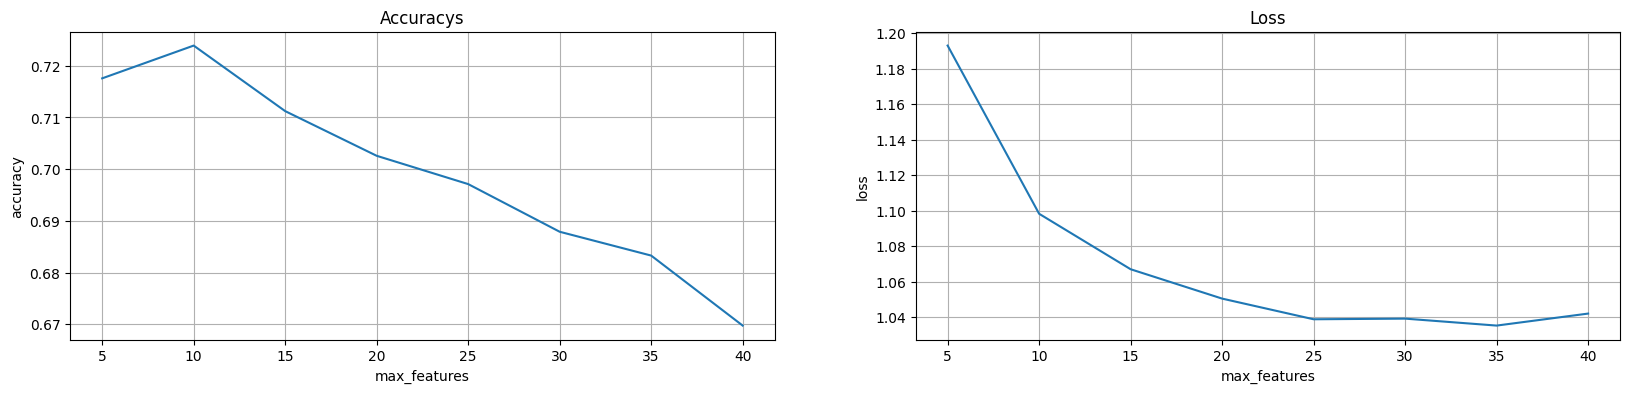

In [51]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axis[0].plot(max_features_candidate, accuracys2)
axis[0].grid()
axis[0].set_title("Accuracys")
axis[0].set_xlabel("max_features")
axis[0].set_ylabel("accuracy")

axis[1].plot(max_features_candidate, losses2)
axis[1].grid()
axis[1].set_title("Loss")
axis[1].set_xlabel("max_features")
axis[1].set_ylabel("loss")

plt.show()
plt.close()

### max_features=10 时效果不错

## max_depth

In [52]:
# 确定max_depth取值范围
max_depth_candidate = np.arange(10, 101, 10)
max_depth_candidate

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [54]:
def turn_max_depth(max_depth_candidate: np.ndarray) -> tuple[list[float], list[float]]:
    accuracys = []
    losses = []
    for n in max_depth_candidate:
        print("*" * 50)
        print("max_depth =", n)
        rf = RandomForestClassifier(
            n_estimators=175,
            max_features=10,
            max_depth=n,  # here
            min_samples_leaf=10,
            oob_score=True,
            random_state=0,
            n_jobs=4,
        )
        rf.fit(x_train, y_train)

        # 预测得分
        score = rf.score(x_val, y_val)
        accuracys.append(score)
        print("score =", score)

        # 预测概率,需要one-hot编码
        y_pred_proba = rf.predict_proba(x_val)
        loss = log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)
        losses.append(loss)
        print("loss =", loss)

    return accuracys, losses

In [ ]:
accuracys3, losses3 = turn_max_depth(max_depth_candidate)

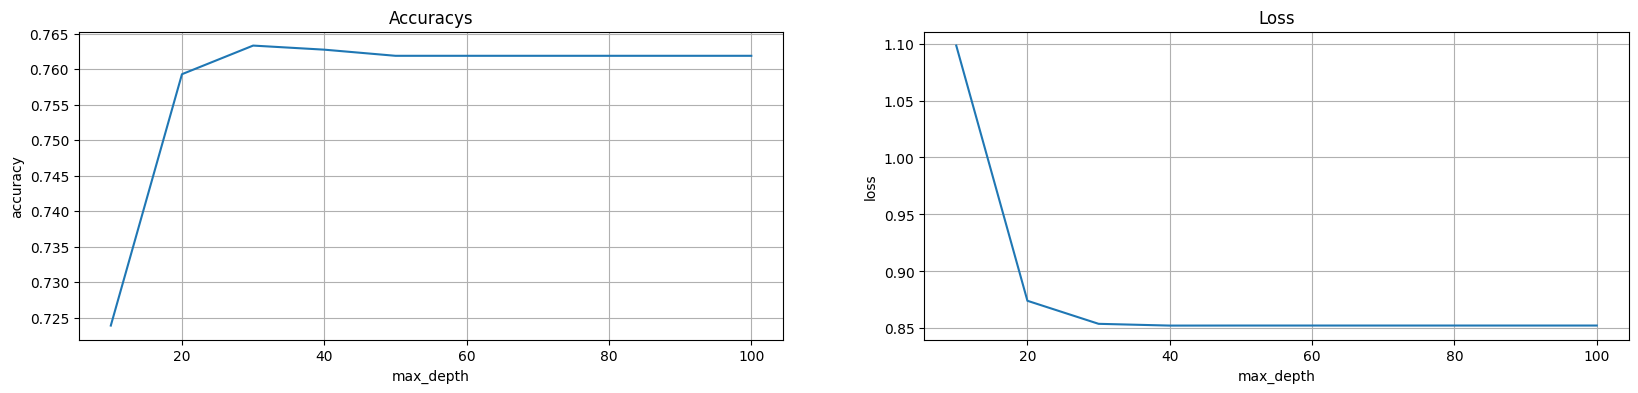

In [56]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axis[0].plot(max_depth_candidate, accuracys3)
axis[0].grid()
axis[0].set_title("Accuracys")
axis[0].set_xlabel("max_depth")
axis[0].set_ylabel("accuracy")

axis[1].plot(max_depth_candidate, losses3)
axis[1].grid()
axis[1].set_title("Loss")
axis[1].set_xlabel("max_depth")
axis[1].set_ylabel("loss")

plt.show()
plt.close()

### max_depth=30 最优

## min_samples_leaf

In [58]:
min_samples_leaf_candidate = np.arange(1, 11, 1)
min_samples_leaf_candidate

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [61]:
def turn_min_samples_leaf(
    min_samples_leaf_candidate: np.ndarray,
) -> tuple[list[float], list[float]]:
    accuracys = []
    losses = []
    for n in min_samples_leaf_candidate:
        print("*" * 50)
        print("min_samples_leaf =", n)
        rf = RandomForestClassifier(
            n_estimators=175,
            max_features=10,
            max_depth=30,
            min_samples_leaf=n,  # here
            oob_score=True,
            random_state=0,
            n_jobs=4,
        )
        rf.fit(x_train, y_train)

        # 预测得分
        score = rf.score(x_val, y_val)
        accuracys.append(score)
        print("score =", score)

        # 预测概率,需要one-hot编码
        y_pred_proba = rf.predict_proba(x_val)
        loss = log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)
        losses.append(loss)
        print("loss =", loss)

    return accuracys, losses

In [ ]:
accuracys4, losses4 = turn_min_samples_leaf(min_samples_leaf_candidate)

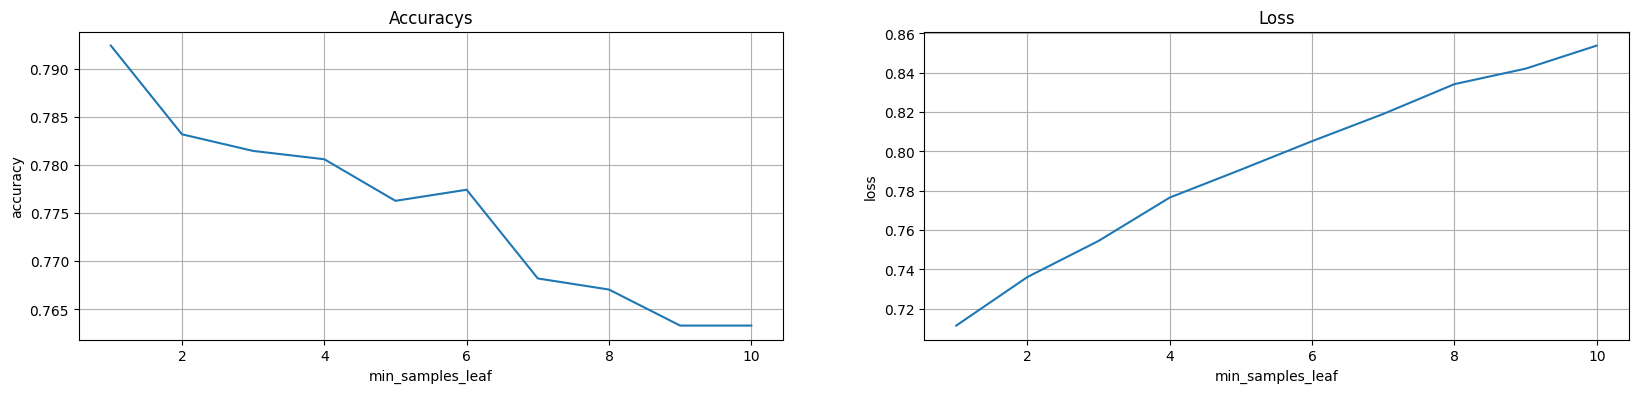

In [63]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axis[0].plot(min_samples_leaf_candidate, accuracys4)
axis[0].grid()
axis[0].set_title("Accuracys")
axis[0].set_xlabel("min_samples_leaf")
axis[0].set_ylabel("accuracy")

axis[1].plot(min_samples_leaf_candidate, losses4)
axis[1].grid()
axis[1].set_title("Loss")
axis[1].set_xlabel("min_samples_leaf")
axis[1].set_ylabel("loss")

plt.show()
plt.close()

### min_samples_leaf=1 时最好

# 确定最优模型
- n_estimators=175
- max_features=10
- max_depth=30
- min_samples_leaf=1


In [64]:
best_rf = RandomForestClassifier(
    n_estimators=175,
    max_features=10,
    max_depth=30,
    min_samples_leaf=1,
    oob_score=True,
    random_state=0,
    n_jobs=4,
)

In [68]:
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features=10, n_estimators=175,
                       n_jobs=4, oob_score=True, random_state=0)

In [104]:
best_rf.score(x_val, y_val)

0.7923985027353873

In [101]:
# 预测概率,需要one-hot编码
y_pred_proba = best_rf.predict_proba(x_val)
log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)

0.7114423798423231

# Test

In [105]:
test_data = pd.read_csv("../data/otto/test.csv")
test_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


## 去除id列

In [74]:
test_data_drop_id = test_data.drop("id", axis=1)
test_data_drop_id[:5]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


## 预测test数据结果

In [106]:
y_pred_test = best_rf.predict(test_data_drop_id)
y_pred_test

array([3, 5, 5, ..., 2, 3, 2])

In [107]:
y_pred_test.shape

(144368,)

## 对比其他得分

In [87]:
submission = pd.read_csv("../data/otto/submission.csv")
submission[:5]

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.034286,0.040000,0.060000,0.774107,0.000000,0.022857,0.040179,0.005714,0.022857
1,2,0.114286,0.040000,0.034286,0.034286,0.017143,0.485714,0.028571,0.217143,0.028571
2,3,0.005714,0.000000,0.000000,0.000000,0.000000,0.988571,0.000000,0.005714,0.000000
3,4,0.027714,0.215714,0.300000,0.277143,0.000000,0.000000,0.017143,0.006286,0.156000
4,5,0.237060,0.000080,0.005834,0.000000,0.005954,0.023057,0.018190,0.199658,0.510166


In [92]:
# 去除id列
submission_drop_id = submission.drop("id", axis=1)
submission_drop_id.shape

(144368, 9)

In [94]:
# 得到最大的得分id
result = np.argmax(submission_drop_id.values, axis=1)
result.shape

(144368,)

In [111]:
# 和另一个提交的结果相似率为 91%
np.equal(y_pred_test, result).sum() / result.size

0.9114069599911337

## 预测概率并保存

In [77]:
y_pred_test_proba = best_rf.predict_proba(test_data_drop_id)
y_pred_test_proba

array([[0.01828571, 0.12589353, 0.13025696, ..., 0.0578221 , 0.        ,
        0.        ],
       [0.03428571, 0.04571429, 0.02285714, ..., 0.04      , 0.25142857,
        0.02285714],
       [0.00571429, 0.        , 0.00571429, ..., 0.00571429, 0.04571429,
        0.        ],
       ...,
       [0.02857143, 0.23765227, 0.34191214, ..., 0.04021226, 0.01142857,
        0.01142857],
       [0.01721088, 0.26905862, 0.09291454, ..., 0.01892697, 0.        ,
        0.00571429],
       [0.00329067, 0.18815705, 0.29918247, ..., 0.18728737, 0.00685292,
        0.00870352]])

In [82]:
# 数据格式改为DataFrame,列名改为Class_?
result_data = pd.DataFrame(y_pred_test, columns=["class"])
result_data[:5]

,class
0,3
1,5
2,5
3,2
4,8


In [80]:
# 数据格式改为DataFrame,列名改为Class_?
result_data_proba = pd.DataFrame(
    y_pred_test_proba, columns=["class_" + str(i) for i in range(1, 10)]
)
result_data_proba[:5]

,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,0.018286,0.125894,0.130257,0.656313,0.011429,0.000000,0.057822,0.000000,0.000000
1,0.034286,0.045714,0.022857,0.028571,0.022857,0.531429,0.040000,0.251429,0.022857
2,0.005714,0.000000,0.005714,0.000000,0.000000,0.937143,0.005714,0.045714,0.000000
3,0.034286,0.323498,0.340420,0.157205,0.000000,0.000000,0.024184,0.022857,0.097551
4,0.337881,0.000743,0.000438,0.000198,0.001404,0.006959,0.046660,0.177131,0.428585


In [83]:
# 添加id列
# column 列名
# value列值
result_data_proba.insert(loc=0, column="id", value=test_data["id"])
result_data_proba.head()

,id,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,1,0.018286,0.125894,0.130257,0.656313,0.011429,0.000000,0.057822,0.000000,0.000000
1,2,0.034286,0.045714,0.022857,0.028571,0.022857,0.531429,0.040000,0.251429,0.022857
2,3,0.005714,0.000000,0.005714,0.000000,0.000000,0.937143,0.005714,0.045714,0.000000
3,4,0.034286,0.323498,0.340420,0.157205,0.000000,0.000000,0.024184,0.022857,0.097551
4,5,0.337881,0.000743,0.000438,0.000198,0.001404,0.006959,0.046660,0.177131,0.428585


In [85]:
# 保存文件
result_data_proba.to_csv("../data/otto/submit.csv", index=False)